## STUDENT INFO:
### 1) Name : Chua Jia Lin, Tan Yi Ya, Evelyn Goh Yuan Qi
### 2) Matric No : A23CS0069, A23CS0187, A23CS0222
### 3) Section : 01

# Phase I: DATA PREPARATION AND CLEANING

## i. Data Loading

In [ ]:
import pandas as pd

In [ ]:
# Load FuelConsumption dataset
print("FuelConsumption.csv:")
fc = pd.read_csv("https://docs.google.com/spreadsheets/d/1y6TL2swXMh_rleRB1t462H4ISz93HWNbWkkMauX9D_0/export?format=csv")
fc.head()

FuelConsumption.csv:


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Display the rows and columns of FuelConsumption dataset
f_rows = fc.shape[0]
f_columns = fc.shape[1]
print(f"Rows: {f_rows}")
print(f"Columns: {f_columns}")

Rows: 1067
Columns: 13


In [ ]:
# Load cars_2025 dataset
print("cars_2025.csv:")
car = pd.read_csv("https://docs.google.com/spreadsheets/d/1QEz8qpZ5odYL8-cYYfq40NUKeasXeFKH_pmWuLhKfB0/export?format=csv")
car.head()

cars_2025.csv:


,date_reg,type,maker,model,colour,fuel,state
0,2025-01-01,motokar,BYD,Seal,white,electric,Rakan Niaga
1,2025-01-01,window_van,Cam,Placer-X,yellow,greendiesel,Johor
2,2025-01-01,jip,Chery,Jaecoo J7,green,petrol,Rakan Niaga
3,2025-01-01,jip,Chery,Jaecoo J7,silver,petrol,Rakan Niaga
4,2025-01-01,jip,Chery,Tiggo,grey,petrol,Rakan Niaga


In [ ]:
# Display the rows and columns of cars_2025 dataset
c_rows = car.shape[0]
c_columns = car.shape[1]
print(f"Rows: {c_rows}")
print(f"Columns: {c_columns}")

Rows: 263578
Columns: 7


## ii. Data Cleaning, Preparation and Wrangling

In [ ]:
# Convert all the column names to lowercase and strip whitespace
fc.columns = fc.columns.str.strip().str.lower()
car.columns = car.columns.str.strip().str.lower()
print("FuelConsumption:\n",fc.columns)
print("\ncars_2025:\n",car.columns)

# List the Categorical (Object) Data
fc_categorical = fc.select_dtypes(include='object').columns
car_categorical = car.select_dtypes(include='object').columns
print("\nFuelConsumption Categorical:\n",fc_categorical)
print("\ncars_2025 Categorical:\n",car_categorical)

# Convert categorical values to lowercase and strip whitespace
for col in fc_categorical:
    fc[col] = fc[col].str.strip().str.lower()
for col in car_categorical:
    car[col] = car[col].str.strip().str.lower()

FuelConsumption:
 Index(['modelyear', 'make', 'model', 'vehicleclass', 'enginesize', 'cylinders',
       'transmission', 'fueltype', 'fuelconsumption_city',
       'fuelconsumption_hwy', 'fuelconsumption_comb',
       'fuelconsumption_comb_mpg', 'co2emissions'],
      dtype='object')

cars_2025:
 Index(['date_reg', 'type', 'maker', 'model', 'colour', 'fuel', 'state'], dtype='object')

FuelConsumption Categorical:
 Index(['make', 'model', 'vehicleclass', 'transmission', 'fueltype'], dtype='object')

cars_2025 Categorical:
 Index(['date_reg', 'type', 'maker', 'model', 'colour', 'fuel', 'state'], dtype='object')


In [ ]:
# Step 2: Check both dataset
print("FuelConsumption:\n",fc.head())
print("\ncars_2025:\n",car.head())

FuelConsumption:
    modelyear   make       model vehicleclass  enginesize  cylinders  \
0       2014  acura         ilx      compact         2.0          4   
1       2014  acura         ilx      compact         2.4          4   
2       2014  acura  ilx hybrid      compact         1.5          4   
3       2014  acura     mdx 4wd  suv - small         3.5          6   
4       2014  acura     rdx awd  suv - small         3.5          6   

  transmission fueltype  fuelconsumption_city  fuelconsumption_hwy  \
0          as5        z                   9.9                  6.7   
1           m6        z                  11.2                  7.7   
2          av7        z                   6.0                  5.8   
3          as6        z                  12.7                  9.1   
4          as6        z                  12.1                  8.7   

   fuelconsumption_comb  fuelconsumption_comb_mpg  co2emissions  
0                   8.5                        33           196  
1 

In [ ]:
# Step 3: Rename the column name of FuelConsumption to match with cars_2025 dataset
car.rename(columns={'maker': 'make'}, inplace=True)

In [ ]:
# Step 4: Merge both datasets
df = pd.merge(fc, car, on=['make', 'model'], how='outer')
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,date_reg,type,colour,fuel,state
0,2014.0,acura,ilx,compact,2.0,4.0,as5,z,9.9,6.7,8.5,33.0,196.0,NaN,NaN,NaN,NaN,NaN
1,2014.0,acura,ilx,compact,2.4,4.0,m6,z,11.2,7.7,9.6,29.0,221.0,NaN,NaN,NaN,NaN,NaN
2,2014.0,acura,ilx hybrid,compact,1.5,4.0,av7,z,6.0,5.8,5.9,48.0,136.0,NaN,NaN,NaN,NaN,NaN
3,NaN,acura,mdx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-03,motokar_pelbagai_utiliti,white,petrol,w.p. kuala lumpur
4,2014.0,acura,mdx 4wd,suv - small,3.5,6.0,as6,z,12.7,9.1,11.1,25.0,255.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Summarize the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278319 entries, 0 to 278318
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   modelyear                 26839 non-null   float64
 1   make                      278319 non-null  object 
 2   model                     278319 non-null  object 
 3   vehicleclass              26839 non-null   object 
 4   enginesize                26839 non-null   float64
 5   cylinders                 26839 non-null   float64
 6   transmission              26839 non-null   object 
 7   fueltype                  26839 non-null   object 
 8   fuelconsumption_city      26839 non-null   float64
 9   fuelconsumption_hwy       26839 non-null   float64
 10  fuelconsumption_comb      26839 non-null   float64
 11  fuelconsumption_comb_mpg  26839 non-null   float64
 12  co2emissions              26839 non-null   float64
 13  date_reg                  277343 non-null  o

In [ ]:
# Statistical summary of numeric data
df.describe()

,modelyear,enginesize,cylinders,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
count,26839.0,26839.000000,26839.000000,26839.000000,26839.000000,26839.000000,26839.000000,26839.000000
mean,2014.0,2.046559,4.195834,9.198830,7.010883,8.192682,35.421327,188.106226
std,0.0,0.625082,0.691109,2.005889,1.259621,1.672923,5.280364,36.390886
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,1.800000,4.000000,7.900000,6.200000,7.200000,31.000000,166.000000
50%,2014.0,1.800000,4.000000,8.500000,6.600000,7.600000,37.000000,175.000000
75%,2014.0,2.400000,4.000000,10.300000,7.600000,9.100000,39.000000,209.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
# Check the missing value
print("Check Missing Value:")
print(df.isnull().sum())

Check Missing Value:
modelyear                   251480
make                             0
model                            0
vehicleclass                251480
enginesize                  251480
cylinders                   251480
transmission                251480
fueltype                    251480
fuelconsumption_city        251480
fuelconsumption_hwy         251480
fuelconsumption_comb        251480
fuelconsumption_comb_mpg    251480
co2emissions                251480
date_reg                       976
type                           976
colour                         976
fuel                           976
state                          976
dtype: int64


In [ ]:
# Split Categorical and Numerical Value
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Handling Missing Numerical Value with Median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Handling Missing Categorical Value with Mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-14-686c0109c346>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-14-686c0109c346>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Recheck the missing value
print("Check Missing Value:")
print(df.isnull().sum())

Check Missing Value:
modelyear                   0
make                        0
model                       0
vehicleclass                0
enginesize                  0
cylinders                   0
transmission                0
fueltype                    0
fuelconsumption_city        0
fuelconsumption_hwy         0
fuelconsumption_comb        0
fuelconsumption_comb_mpg    0
co2emissions                0
date_reg                    0
type                        0
colour                      0
fuel                        0
state                       0
dtype: int64


In [ ]:
# Recheck the dataset
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,date_reg,type,colour,fuel,state
0,2014.0,acura,ilx,compact,2.0,4.0,as5,z,9.9,6.7,8.5,33.0,196.0,2025-02-28,motokar,grey,petrol,rakan niaga
1,2014.0,acura,ilx,compact,2.4,4.0,m6,z,11.2,7.7,9.6,29.0,221.0,2025-02-28,motokar,grey,petrol,rakan niaga
2,2014.0,acura,ilx hybrid,compact,1.5,4.0,av7,z,6.0,5.8,5.9,48.0,136.0,2025-02-28,motokar,grey,petrol,rakan niaga
3,2014.0,acura,mdx,compact,1.8,4.0,m5,x,8.5,6.6,7.6,37.0,175.0,2025-02-03,motokar_pelbagai_utiliti,white,petrol,w.p. kuala lumpur
4,2014.0,acura,mdx 4wd,suv - small,3.5,6.0,as6,z,12.7,9.1,11.1,25.0,255.0,2025-02-28,motokar,grey,petrol,rakan niaga


In [ ]:
# Display the rows and columns of combined dataset
d_rows = df.shape[0]
d_columns = df.shape[1]
print(f"Rows: {d_rows}")
print(f"Columns: {d_columns}")
#264645

Rows: 278319
Columns: 18


## iii. Data Aggregation and Group Operations

In [ ]:
# Group by Car Manufacturer to shows which manufacturers produce more polluting vehicles on average.
grouped_make = df.groupby('make').agg({
    'fuelconsumption_comb': 'mean',
    'co2emissions': 'mean',
    'model': 'count'  # number of models registered
}).rename(columns={'model': 'car_count'}).reset_index()

grouped_make.sort_values(by='co2emissions', ascending=False).head()

,make,fuelconsumption_comb,co2emissions,car_count
77,srt,16.900000,389.000000,2
73,rolls-royce,16.571429,381.000000,7
30,gmc,16.755102,328.244898,49
70,ram,13.569231,291.230769,13
11,cadillac,12.896875,287.343750,32


In [ ]:
# Group by Vehicle Class to analyze how different vehicle types contribute to emissions
grouped_class = df.groupby('vehicleclass').agg({
    'fuelconsumption_city': 'mean',
    'fuelconsumption_hwy': 'mean',
    'co2emissions': 'mean'
}).reset_index()
grouped_class.sort_values(by='co2emissions', ascending=False).head()

,vehicleclass,fuelconsumption_city,fuelconsumption_hwy,co2emissions
15,van - passenger,23.228000,16.760000,401.000000
14,van - cargo,20.881818,16.059091,361.500000
6,pickup truck - standard,17.009677,12.435484,309.096774
12,suv - standard,14.929484,10.676457,295.989910
5,pickup truck - small,13.750000,10.633333,284.250000


In [ ]:
# Group by Fuel Type to compares how fuel types affect emissions and fuel consumption.
grouped_fuel = df.groupby('fuel').agg({
    'co2emissions': ['mean', 'max'],
    'fuelconsumption_comb': 'mean'
}).reset_index()
grouped_fuel.sort_values(by=[('co2emissions', 'mean'), ('co2emissions', 'max'), ('fuelconsumption_comb', 'mean')],ascending=[False, False, False]).head()

fuel co2emissions        fuelconsumption_comb
                         mean    max                 mean
4  hybrid_petrol   180.228988  313.0             7.828898
5         petrol   176.211759  488.0             7.655127
0         diesel   175.804812  262.0             7.634947
1       electric   175.000000  175.0             7.600000
2    greendiesel   175.000000  175.0             7.600000

In [ ]:
#Group by State to reveals regional differences in vehicle emissions, possibly related to policy or consumer behavior
grouped_state = df.groupby('state').agg({
    'co2emissions': 'mean',
    'fuelconsumption_comb': 'mean'
}).reset_index()
grouped_state.sort_values(by='co2emissions', ascending=False).head()

,state,co2emissions,fuelconsumption_comb
14,w.p. kuala lumpur,179.257568,7.785685
8,pulau pinang,179.041054,7.776178
12,selangor,178.533146,7.754330
0,johor,178.437644,7.750023
6,perak,177.661578,7.716370


# Phase II: DATA ANALYTICS, VISUALIZATION AND VIDEO RECORDING

i. Summary Analytics

In [ ]:
# Basic summary
print(fc.describe())

       modelyear   enginesize    cylinders  fuelconsumption_city  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       fuelconsumption_hwy  fuelconsumption_comb  fuelconsumption_comb_mpg  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [ ]:
# CO2 emissions: Top and bottom 5 car makes
avg_emissions = fc.groupby('make')['co2emissions'].mean().sort_values(ascending=False)
print("Top 5 CO2 emitters:\n", avg_emissions.head(5))
print()
print("Bottom 5 CO2 emitters:\n", avg_emissions.tail(5))

Top 5 CO2 emitters:
 make
lamborghini     394.000000
srt             389.000000
rolls-royce     381.000000
bentley         359.000000
aston martin    351.571429
Name: co2emissions, dtype: float64

Bottom 5 CO2 emitters:
 make
scion    198.888889
mazda    193.037037
mini     188.527778
fiat     179.500000
smart    147.000000
Name: co2emissions, dtype: float64


In [ ]:
# Correlation with CO2 emissions
print(fc.corr(numeric_only=True)['co2emissions'].sort_values(ascending=False))

co2emissions                1.000000
fuelconsumption_city        0.898039
fuelconsumption_comb        0.892129
enginesize                  0.874154
fuelconsumption_hwy         0.861748
cylinders                   0.849685
fuelconsumption_comb_mpg   -0.906394
modelyear                        NaN
Name: co2emissions, dtype: float64


In [ ]:
# The average CO2 emissions for each fuel type and sort them in ascending order
fuel_emissions = fc.groupby('fueltype')['co2emissions'].mean().sort_values()
print(fuel_emissions)


fueltype
d    227.777778
x    241.097276
z    268.529954
e    291.086957
Name: co2emissions, dtype: float64


In [ ]:
# The average CO2 emissions for each vehicle class and sort them in ascending order
vc_emissions = fc.groupby('vehicleclass')['co2emissions'].mean().sort_values()
print(vc_emissions)


vehicleclass
compact                     216.715116
station wagon - small       221.111111
mid-size                    226.483146
special purpose vehicle     235.285714
minicompact                 235.553191
station wagon - mid-size    235.666667
suv - small                 242.694805
subcompact                  252.615385
minivan                     260.142857
two-seater                  265.676056
full-size                   267.651163
pickup truck - small        284.250000
suv - standard              307.672727
pickup truck - standard     309.096774
van - cargo                 361.500000
van - passenger             401.000000
Name: co2emissions, dtype: float64


ii.  Machine Learning Method: Decision Tree

In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create emission class labels based on co2emissions
# Divides the emission values into 3 categories using fixed bin edges.
fc['EMISSION_CLASS'] = pd.cut(fc['co2emissions'],
                              bins=[0, 150, 200, fc['co2emissions'].max()],
                              labels=['Low', 'Medium', 'High'])

# Select features used for analysis that can affect the co2emissions
features = fc[['enginesize', 'cylinders', 'fuelconsumption_comb']]

# Select "EMISSION_CLASS" as label
labels = fc['EMISSION_CLASS']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
# Confusion matrix shows the number of correct/incorrect predictions.
# Classification report gives precision, recall, F1-score for each class.
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))


[[159   0   2]
 [  0   6   0]
 [  2   0  45]]

              precision    recall  f1-score   support

        High       0.99      0.99      0.99       161
         Low       1.00      1.00      1.00         6
      Medium       0.96      0.96      0.96        47

    accuracy                           0.98       214
   macro avg       0.98      0.98      0.98       214
weighted avg       0.98      0.98      0.98       214



**Model Interpretation:**

The Decision Tree model achieved an overall accuracy of 98% in classifying vehicles into low, medium, and high CO₂ emission categories. The model performed exceptionally well across all classes. For instance, it attained a precision of 0.99 and recall of 0.99 for the “High” emission class, and perfect scores (1.00) for the “Low” class, although that class had a small support size (only 6 samples). The “Medium” class also showed strong performance, with precision and recall at 0.96 each. The high macro and weighted averages (0.98) for all evaluation metrics further confirm that the model performs consistently well across the different emission levels. These results indicate that engine size, number of cylinders, and combined fuel consumption are strong predictors for estimating a car's CO₂ emission class.

iii. Visualization

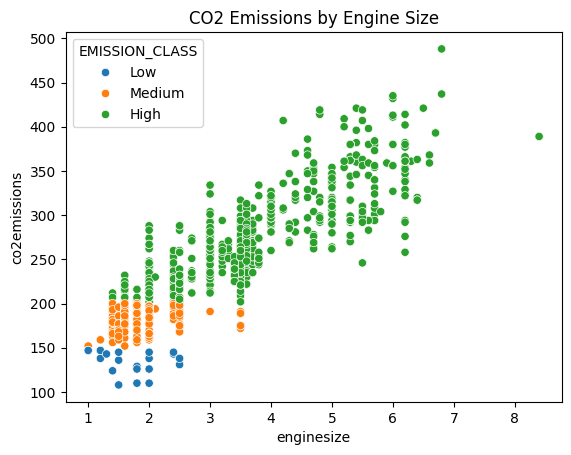

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
sns.scatterplot(data=fc, x='enginesize', y='co2emissions', hue='EMISSION_CLASS')
plt.title("CO2 Emissions by Engine Size")
plt.show()


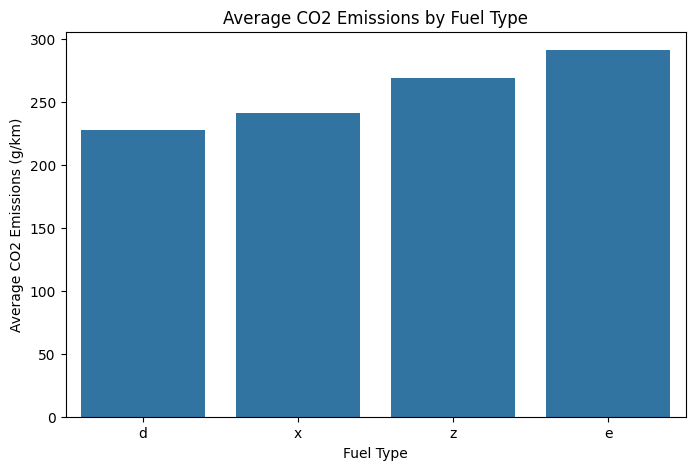

In [ ]:
# Average CO2 emissions by fuel type
avg_emission_fuel = fc.groupby('fueltype')['co2emissions'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_emission_fuel.index, y=avg_emission_fuel.values)
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.show()


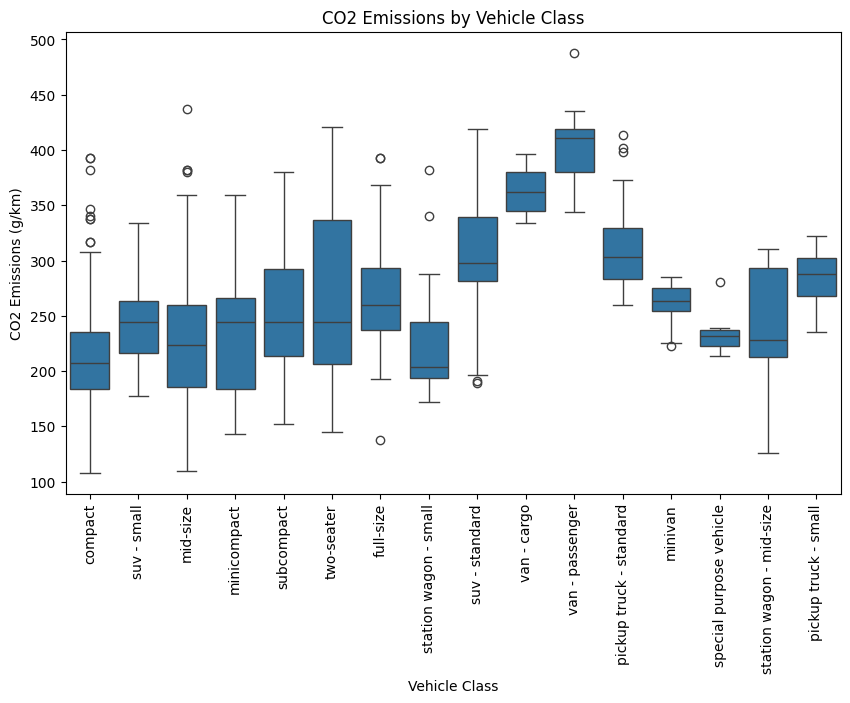

In [ ]:
# Average CO2 emissions by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(data=fc, x='vehicleclass', y='co2emissions')
plt.xticks(rotation=90)
plt.title("CO2 Emissions by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

**not using. Can emission levels be predicted from the fuel type and vehicle class of a car?**

ML Method: Supervised Learning (Decision Tree Classifier)

Features: fueltype (categorical), vehicleclass (categorical), enginesize (numerical)

In [ ]:
# not using
# Import necessary modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode 'fueltype' and 'vehicleclass' into numeric format
le_fuel = LabelEncoder()
le_class = LabelEncoder()

df['fuel_encoded'] = le_fuel.fit_transform(df['fueltype'])
df['class_encoded'] = le_class.fit_transform(df['vehicleclass'])

# Features and target
X = df[['fuel_encoded', 'class_encoded', 'enginesize']]
y = df['emission_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
# i add max_depth=3
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


#visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for CO₂ Emission Classification")
plt.show()


**Conclusion:**

The model demonstrates that fuel type, vehicle class, and engine size can predict a car’s CO₂ emission level with high overall accuracy. Most notably, medium and high emission categories were classified with excellent precision and recall.

However, the model struggled with the low-emission category, likely due to the very small number of samples (n=3) in that class. This imbalance makes it hard for the model to generalize well for that group.

Overall, the results support that fuel and vehicle category are valuable indicators of CO₂ output, and can be used effectively for emission classification with enough data diversity.



**d.Can car models be classified into emission categories using only fuel efficiency ratings (MPG)**

ML Method: Supervised Learning (Decision Tree Classifier)

Features: fuelconsumption_comb_mpg

Target: emission_class

In [ ]:
#not using
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Feature and target
X = df[['fuelconsumption_comb_mpg']]
y = df['emission_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=X['fuelconsumption_comb_mpg'])
plt.title('Fuel Efficiency (MPG) by Emission Class')
plt.xlabel('Emission Class')
plt.ylabel('Fuel Consumption (MPG)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:**

The clustering results show that car models can be naturally grouped by emission-related features like fuel consumption and engine size. Cars with similar emission characteristics consistently fall into the same cluster:

Cluster 0: Likely low-emission vehicles (e.g., hybrids, small cars).

Cluster 1: High-emission cars (e.g., larger engines, SUVs, performance vehicles).

Cluster 2: Mid-range cars with moderate emissions.

This supports the idea that unsupervised learning can uncover meaningful groupings that align with real-world emission trends.